# Solution - énoncé avril 2016

Les bonns réponses sont en **gras**.

In [1]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pyensae
%nb_menu

Populating the interactive namespace from numpy and matplotlib


## QCM

### Que fait le programme suivant ?

* Il trie.
* **Il vérifie qu'un tableau est trié.**
* Rien car la boucle ne commence pas à 0.

In [11]:
l = [0,1,2,3,4,6,5,8,9,10]
res = True
for i in range(1,len (l)) :
    if l[i-1] > l[i]:   # un tableau n'est pas trié si deux éléments consécutifs
      res = False       # ne sont pas dans le bon ordre
print(res)

False


### La fonction suivante ne fonctionne pas sur ...

* Le nombre 0.
* La constante ``"123"``.
* **Les nombres strictement négatifs**

In [12]:
def somme(n):
    return sum ( [ int(c) for c in str(n) ] )
    #  un signe moins aménera le calcul de int('-') qui edt invalide

somme(0), somme("123")

(0, 6)

### Le programme suivant provoque une erreur. Quelle est l'exception qu'il va produire ?

* ``SyntaxError``
* ``TypeError``
* **``IndexError``**

In [13]:
# déclenche une exception
li = list(range(0,10))
sup = [0,9]
for i in sup :
    del li [i]  # on supprime le premier élément
    # à ce moment le dernier élément est d'indice 8 et non plus 9

IndexError: list assignment index out of range

### Entourer ce que est vrai à propos de la fonction suivante ?

* **Elle est récursive.**
* Il manque une condition d'arrêt.
* **``fibo(4)`` appelle récursivement 8 fois ``fibo``: une fois ``fibo(3)``, deux fois ``fibo(2)``, trois fois ``fibo(1)`` et deux fois ``fibo(0)``**

In [14]:
def fibo (n) :
    print("fibo", n)
    if   n < 1  : return 0
    elif n == 1 : return 1
    else : return fibo (n-1) + fibo (n-2)

fibo(4)

fibo 4
fibo 3
fibo 2
fibo 1
fibo 0
fibo 1
fibo 2
fibo 1
fibo 0


3

La fonction est évidemment récursive car elle s'appelle elle-même, elle fait même deux appels récursifs au sein de la même fonction ce qui explique les nombreux appels.

### Combien de lignes comporte le dataframe ``df2`` ?

* **3**
* 4
* 5
* 6
* 7
* 8
* 9
* Aucun, le code provoque une erreur.

In [16]:
import pandas
df = pandas.DataFrame([dict(x=1, t="e"), dict(x=3, t="f"), dict(x=4, t="e")])
df2 = df.merge(df, left_on="x", right_on="x")
df2

,t_x,x,t_y
0,e,1,e
1,f,3,f
2,e,4,e


Le dataframe initial a 3 lignes. On le fusionne avec lui même avec une colonne qui ne contient des valeurs distinctes. Chaque ligne ne fusionnera qu'avec une seule ligne. Le résultat contient 3 lignes.

### Combien de lignes comporte le dataframe ``df3`` ?

* 3
* 4
* **5**
* 6
* 7
* 8
* 9
* Aucun, le code provoque une erreur.

In [17]:
import pandas
df = pandas.DataFrame([dict(x=1, t="e"), dict(x=3, t="f"), dict(x=4, t="e")])
df3 = df.merge(df, left_on="t", right_on="t")
df3.head()

,t,x_x,x_y
0,e,1,1
1,e,1,4
2,e,4,1
3,e,4,4
4,f,3,3


Le dataframe initial a 3 lignes. On le fusionne avec lui même avec une colonne qui  contient des valeurs non distinctes. Il y a 2 ``'e'`` et 1 ``'f'``. La clé unique ``'f'`` fusionnera avec elle-même, les clés ``'e'`` fusionneront les unes avec les autres soit 2x2 = 4 lignes. Résultat : 1 + 4 = 5.

## Dataframes

On suppose qu'on a un fichier de données trop gros pour être chargé en mémoire. On veut produire des statistiques simples.
Pour tester votre code, vous pourrez utiliser le fichier *data.txt* construit comme suit :

In [18]:
import pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/"
url += "default%20of%20credit%20card%20clients.xls"
df = pandas.read_excel(url, skiprows=1)
df.to_csv("data.txt", encoding="utf-8", sep="\t", index=False)

### Q1

Ecrire une fonction qui agrège un dataset par **AGE** et calcule le mininum, maximum et la moyenne en une seule fois pour les variables **LIMIT_BAL**, **default payment next month** et qui calcule le nombre d'observations partageant le même **AGE**.

In [21]:
res = df.groupby("AGE").agg({"LIMIT_BAL": (min, max, numpy.mean),
                        "ID":len,
                        "default payment next month": (min, max, numpy.mean)})
res.head()

LIMIT_BAL                           ID default payment next month      \
          min     max           mean   len                        min max   
AGE                                                                         
21      10000   60000   23283.582090    67                          0   1   
22      10000  200000   37928.571429   560                          0   1   
23      10000  500000   59752.953813   931                          0   1   
24      10000  420000   75661.047028  1127                          0   1   
25      10000  500000  102731.871838  1186                          0   1   

               
         mean  
AGE            
21   0.208955  
22   0.301786  
23   0.265306  
24   0.266193  
25   0.254637

### Q2

Lire la documentation de [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). On veut charger un fichier en plusieurs morceaux et pour chaque morceau, calculer l'agrégation ci-dessus. Le nom des colonnes n'est présent qu'à la première ligne du programme.

In [26]:
aggs = []
step = 10000
columns = None
for i in range(0, df.shape[0], step):
    part = pandas.read_csv("data.txt", encoding="utf-8", sep="\t",
                        skiprows=i, 
                        nrows=step, 
                        header=0 if columns is None else None,
                        names=columns)
    agg = part.groupby("AGE").agg({"LIMIT_BAL": (min, max, numpy.mean),
                        "ID":len,
                        "default payment next month": (min, max, numpy.mean)})
    aggs.append(agg)
    if columns is None:
        columns = part.columns

tout = pandas.concat(aggs)
tout.head()

LIMIT_BAL                          ID default payment next month      \
          min     max           mean  len                        min max   
AGE                                                                        
21      10000   60000   23846.153846   26                          0   1   
22      10000  150000   34720.812183  197                          0   1   
23      10000  500000   63718.750000  320                          0   1   
24      10000  400000   71879.518072  415                          0   1   
25      10000  440000  100143.540670  418                          0   1   

               
         mean  
AGE            
21   0.192308  
22   0.279188  
23   0.268750  
24   0.306024  
25   0.277512

Les points importants :
    
* on utilise la fonction [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) pour lire le fichier par morceaux avec *skip_rows* et *nrows*
* on calcul les statistiques sur chaque morceau
* le nom des colonnes n'apparaît qu'à la première ligne, donc il faut les conserver pour les ajouter lorsqu'on charge le second morceau du fichier (et les suivant)

### Q3

Le dataframe ``tout`` est la concaténation de deux dataframes contenant des informations aggrégées pour chaque morceau. On veut maintenant obtenir les mêmes informations agrégrées pour l'ensemble des données uniquement à partir du dataframe ``tout``. Ecrire le code qui fait cette agrégation.

In [30]:
tout[("LIMIT_BAL","w")] = tout[("LIMIT_BAL", "mean")] * tout[("ID", "len")]
# faire attention aux pondérations ici
tout[("default payment next month","w")] = tout[("default payment next month", "mean")] * tout[("ID", "len")]
toutm = tout.reset_index()

tout_agg = toutm.groupby("AGE").agg({ ("LIMIT_BAL", "min"): min,
                                     ("LIMIT_BAL", "max"): max,
                                     ("LIMIT_BAL", "w"): sum,
                                     ("default payment next month", "min"): min,
                                     ("default payment next month", "max"): max,
                                     ("default payment next month", "w"): sum,
                                     ("ID", "len"):sum,
                                    })
# et là
tout_agg[("LIMIT_BAL", "mean")] = tout_agg[("LIMIT_BAL", "w")] / tout_agg[("ID", "len")]
tout_agg[("default payment next month", "mean")] = tout_agg[("default payment next month", "w")] / tout_agg[("ID", "len")]
tout_agg = tout_agg [ sorted(tout_agg.columns)]
tout_agg.head()

ID LIMIT_BAL                                   \
      len       max           mean    min          w   
AGE                                                    
21     67     60000   23283.582090  10000    1560000   
22    560    200000   37928.571429  10000   21240000   
23    931    500000   59752.953813  10000   55630000   
24   1127    420000   75661.047028  10000   85270000   
25   1186    500000  102731.871838  10000  121840000   

    default payment next month                     
                           max      mean min    w  
AGE                                                
21                           1  0.208955   0   14  
22                           1  0.301786   0  169  
23                           1  0.265306   0  247  
24                           1  0.266193   0  300  
25                           1  0.254637   0  302

Calculer une moyenne sur des observations est assez facile mais cela se complique quand on fait une moyenne de moyennes. Il faut retenir le nombre d'observations que représente chaque moyenne sinon la moyenne finale sera fausse. Cela explique la ligne 3.

### Q4

Tracer un histogramme avec la valeur moyenne de la variable ``LIMIT_BAL``, on ajoutera deux lignes pour les valeurs *min* et *max*. Quelques indications : [How to align the bar and line in matplotlib two y-axes chart?](http://stackoverflow.com/questions/19952290/how-to-align-the-bar-and-line-in-matplotlib-two-y-axes-chart).

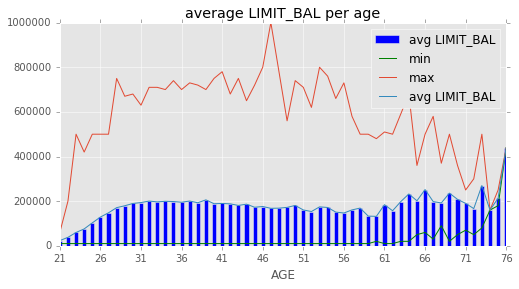

In [31]:
data = tout_agg
f, ax = plt.subplots(figsize=(8,4))
data.plot(y=("LIMIT_BAL", "mean"), label="avg LIMIT_BAL", kind="bar", ax=ax)
x = ax.get_xticks()
data.plot(x=x, y=("LIMIT_BAL", "min"), label="min", kind="line", ax=ax, color="green")
data.plot(x=x, y=("LIMIT_BAL", "max"), label="max", kind="line", ax=ax)
data.plot(x=x, y=("LIMIT_BAL", "mean"), label="avg LIMIT_BAL", kind="line", ax=ax)
ax.xaxis.set_ticks(x[::5])
ax.xaxis.set_ticklabels(x[::5]+min(data.index))
ax.set_title("average LIMIT_BAL per age")